# Applying z score Normal Distribution 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('placement.csv')

In [8]:
df.sample(5)

,cgpa,placement_exam_marks,placed
839,6.44,24.0,1
655,7.36,34.0,0
855,7.89,9.0,1
686,7.15,62.0,1
832,6.91,59.0,0


In [17]:
df.shape

(1000, 3)

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


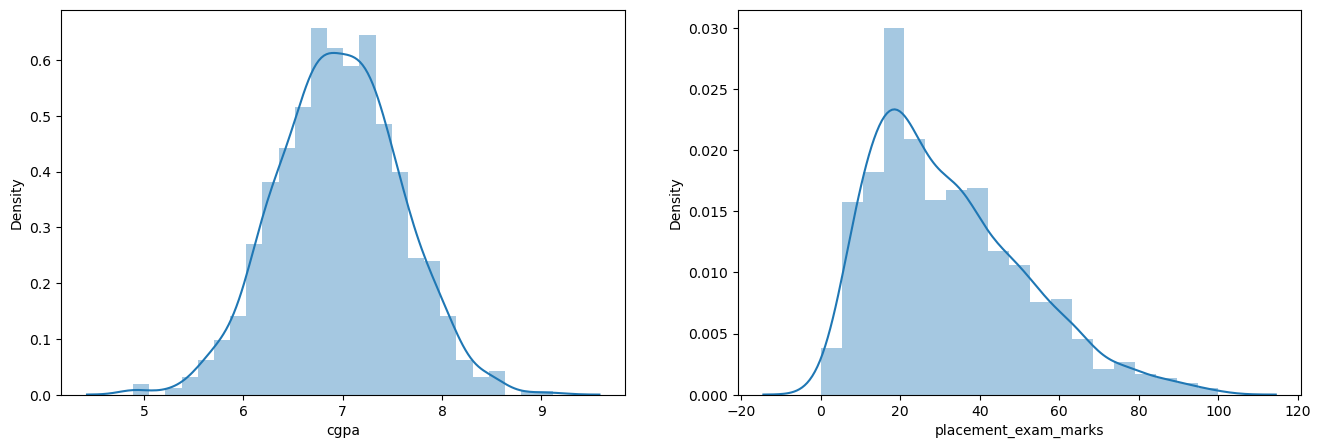

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [41]:
df['cgpa'].skew()  #the value will be closer to zero because it is normal distribution skew will be zero

-0.003704380991302917

In [6]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [11]:
# find the boundary value for cgpa because z-score can be done for normal distribution
print("highest allowed", df['cgpa'].mean() + 3*df['cgpa'].std())
print("lowest allowed", df['cgpa'].mean() - 3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [13]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]       #find outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [15]:
new_df = df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]     #Trimming  approach1
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [18]:
# Approach2 calculating z-score

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [19]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [20]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [21]:
df[df['cgpa_zscore']< -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [24]:
df[(df['cgpa_zscore']>3) | (df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [27]:
# trimming
new_df = df[(df['cgpa_zscore']<3) & (df['cgpa_zscore']>-3)]

In [28]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


 # Capping

In [30]:
upper_limit = df['cgpa'].mean() + 3* df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3* df['cgpa'].std()

In [31]:
upper_limit

8.808933625397168

In [34]:
df['cgpa'] = np.where(df['cgpa']>upper_limit,upper_limit,np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa']))

In [36]:
df.shape

(1000, 4)

In [38]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# IQR Box plot

In [42]:
# IQR Box plot is applied only for skewed graph
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: >

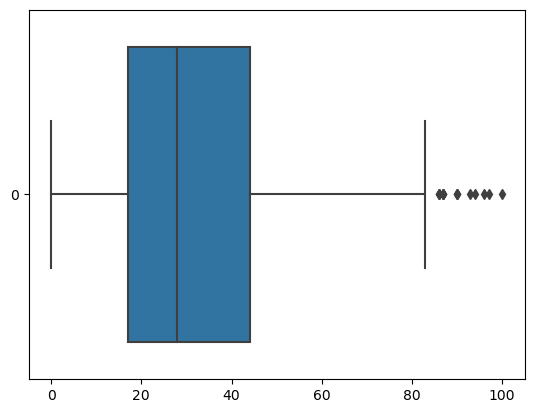

In [46]:
sns.boxplot(df['placement_exam_marks'],orient='h')

In [58]:
#finding IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [59]:
percentile25

17.0

In [60]:
percentile75

44.0

In [62]:
iqr = percentile75 - percentile25
iqr

27.0

In [63]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [64]:
print(upper_limit,lower_limit)

84.5 -23.5


# Finding Outliers

In [65]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [67]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


# Trimming

In [68]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [71]:
new_df.shape

(985, 4)

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\2280894339.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\2280894339.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'

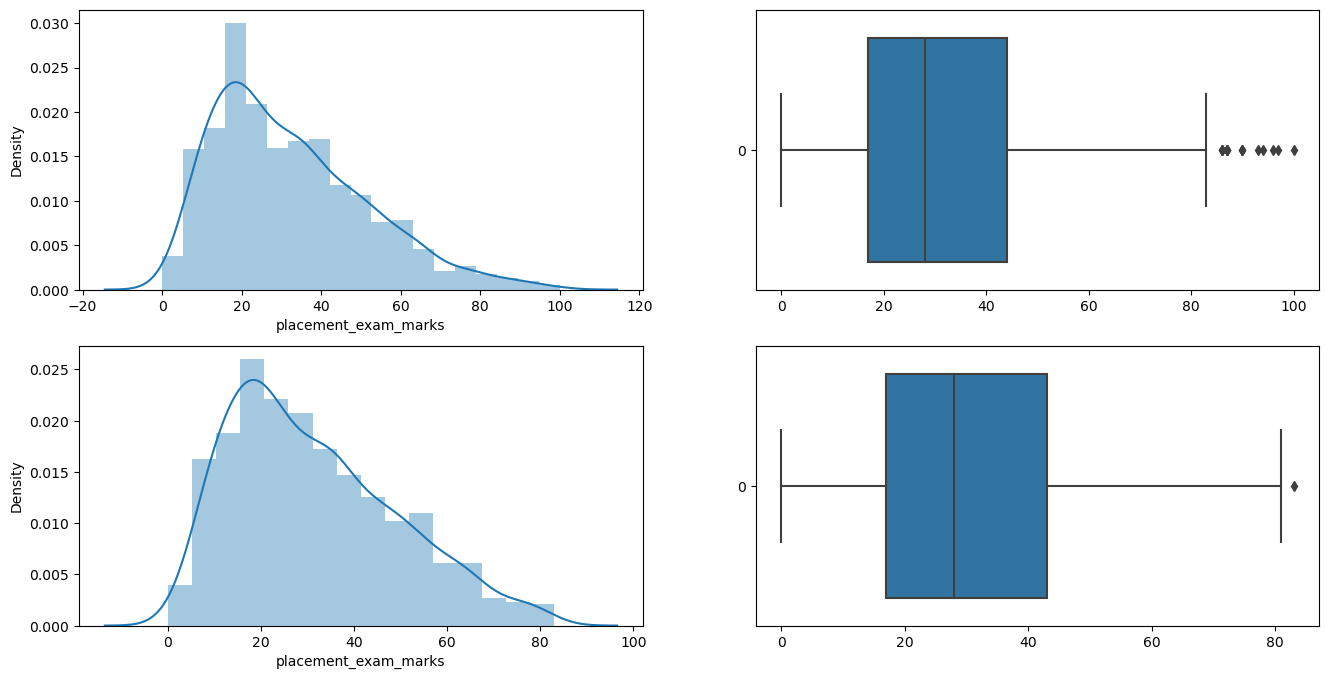

In [75]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')
plt.show()

# Capping

In [76]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks']>upper_limit,upper_limit,np.where(new_df_cap['placement_exam_marks']<lower_limit,lower_limit,new_df_cap['placement_exam_marks']))

In [77]:
new_df_cap.shape

(1000, 4)

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\2171845093.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])
C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\2171845093.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exa

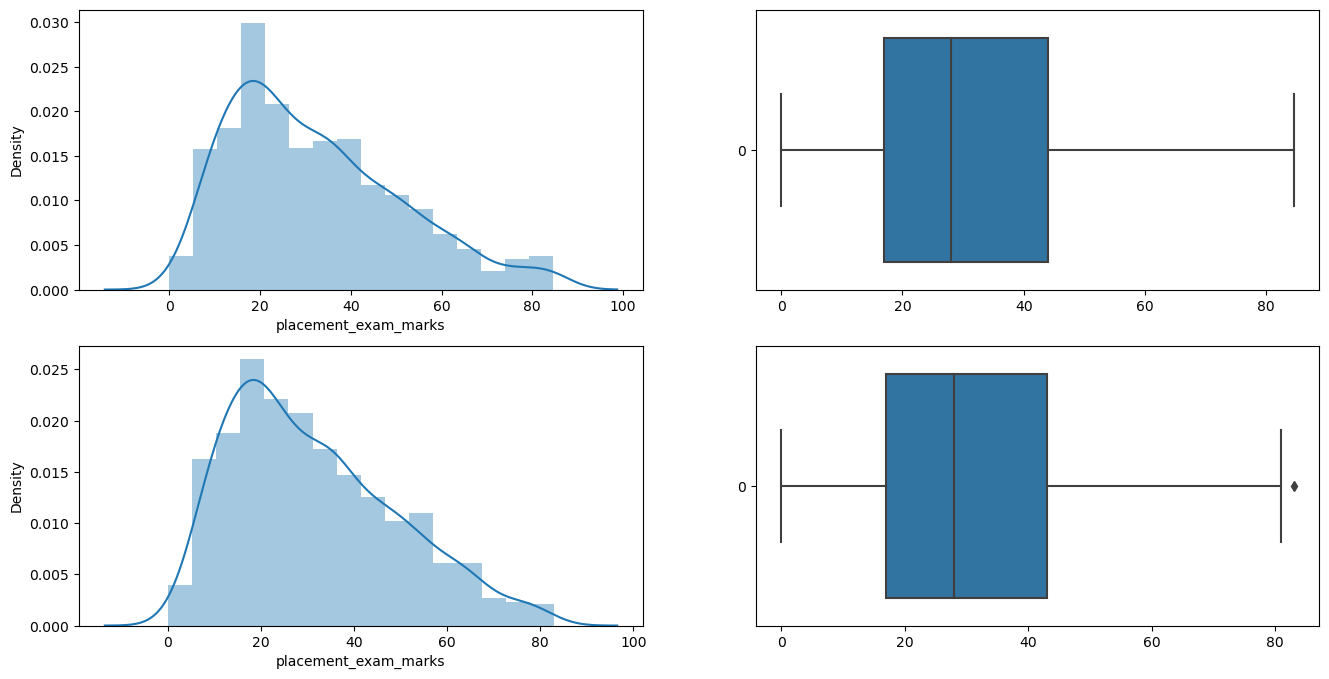

In [78]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(new_df_cap['placement_exam_marks'],orient='h')

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'],orient='h')
plt.show()

# Percentile Method

# Trimming

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
df=pd.read_csv('weight-height.csv')

In [99]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [100]:
df.shape

(10000, 3)

In [101]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\2172644568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: >

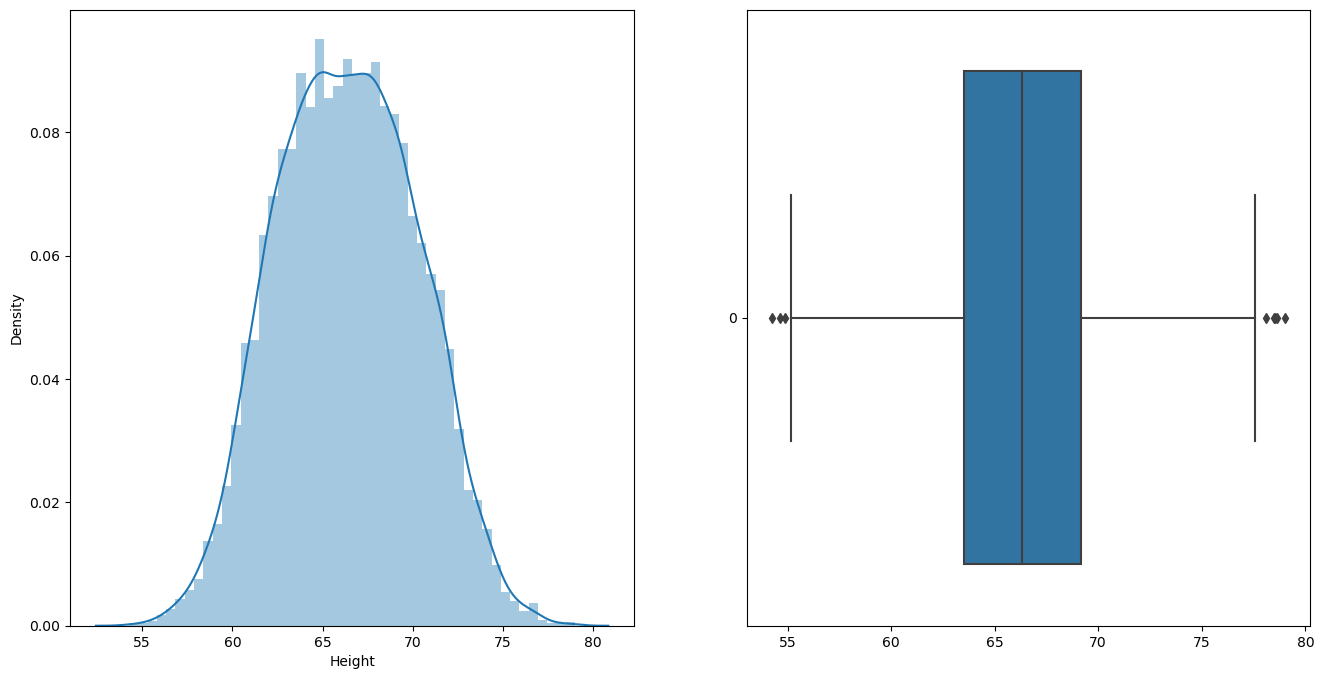

In [108]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Height'])
plt.subplot(1,2,2)

sns.boxplot(df['Height'], orient='h')

In [109]:
upper_limit =df['Height'].quantile(0.99)
lower_limit =df['Height'].quantile(0.01)

In [110]:
print(upper_limit,lower_limit)

74.7857900583366 58.13441158671655


In [114]:
new_df_per = df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]

In [115]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [116]:
new_df_per.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\1786244525.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])
C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\1786244525.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_per['Height'])


<Axes: >

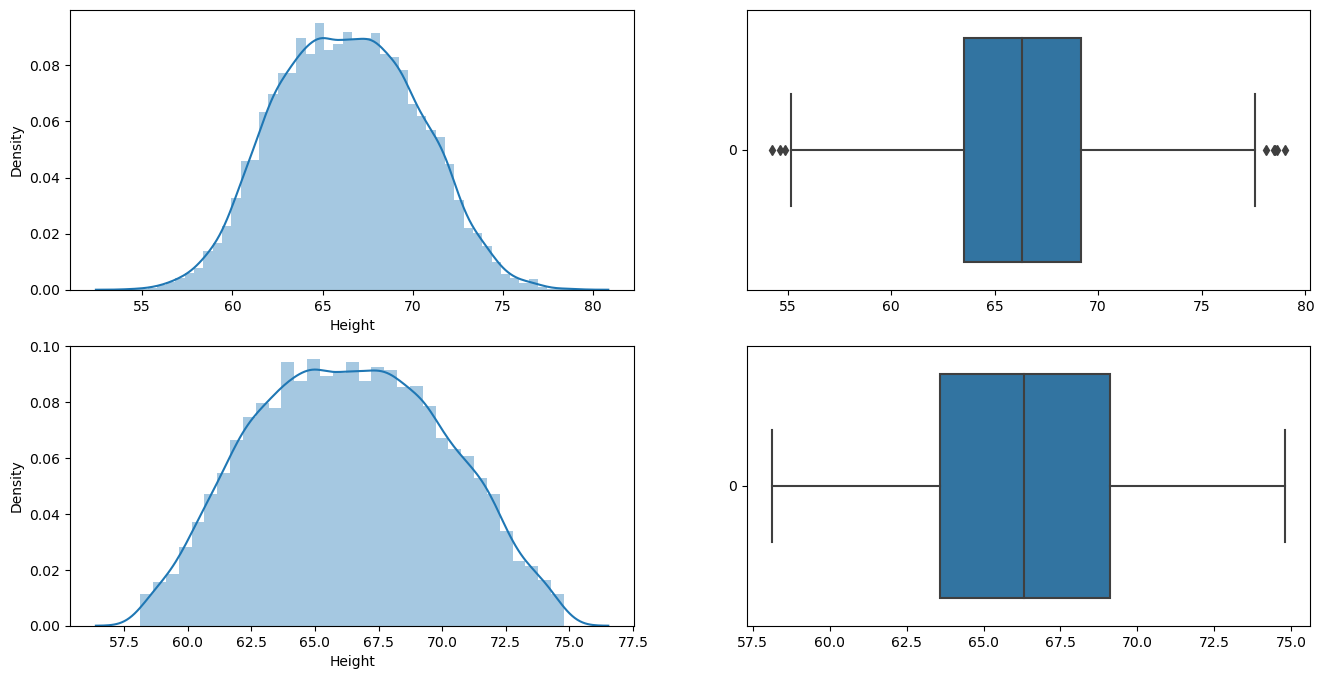

In [118]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(df['Height'], orient='h')


plt.subplot(2,2,3)
sns.distplot(new_df_per['Height'])

plt.subplot(2,2,4)
sns.boxplot(new_df_per['Height'], orient='h')

# Capping -->Winsorization

In [122]:
new_df_p = df.copy()
new_df_p['Height']= np.where(new_df_p['Height']>upper_limit,upper_limit,np.where(new_df_p['Height']<lower_limit,lower_limit,new_df_p['Height']))

In [125]:
new_df_p['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\755338645.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_p['Height'])
C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_16244\755338645.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_per['Height'])


<Axes: >

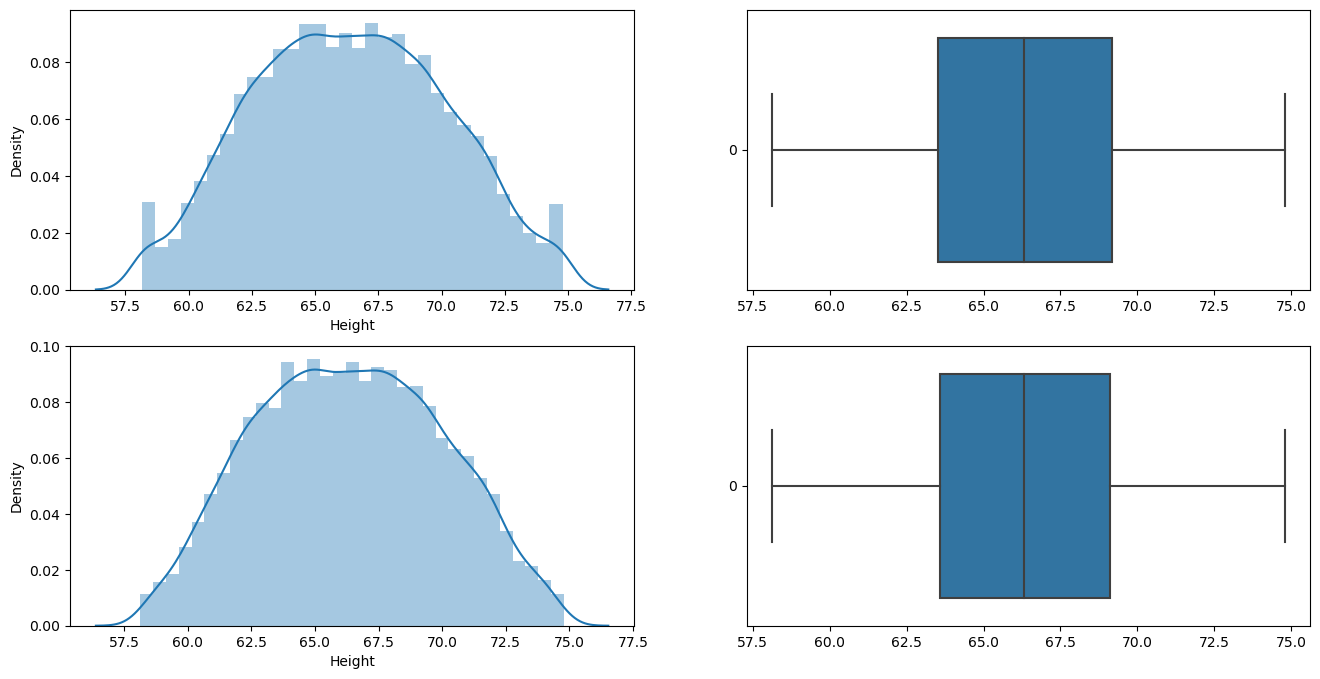

In [126]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(new_df_p['Height'])

plt.subplot(2,2,2)
sns.boxplot(new_df_p['Height'], orient='h')


plt.subplot(2,2,3)
sns.distplot(new_df_per['Height'])

plt.subplot(2,2,4)
sns.boxplot(new_df_per['Height'], orient='h')

# Isolation Forest Anamoly Detection - Unsupervised learning

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('placement.csv',usecols=['placement_exam_marks','cgpa'])

In [109]:
df.sample(5)

,cgpa,placement_exam_marks
45,6.92,10.0
606,6.79,24.0
550,6.62,38.0
15,7.10,21.0
130,5.91,53.0


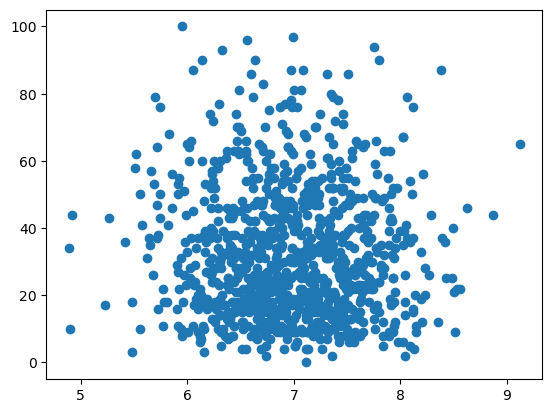

In [110]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [111]:
from sklearn.ensemble import IsolationForest


In [112]:
iso = IsolationForest(contamination= 0.5)
iso.fit(df)
prediction = iso.predict(df)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [113]:
index = np.where(prediction<0)
x=df.values

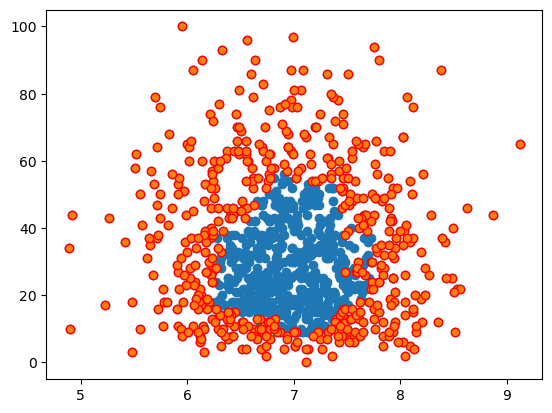

In [114]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.scatter(x[index,0],x[index,1],edgecolors='r')

# DBSCAN()

In [115]:
x= pd.read_csv('placement.csv',usecols=['placement_exam_marks','cgpa'])

In [116]:
y = pd.read_csv('placement.csv',usecols=['placed'])

In [117]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.10)
db.fit_predict(x)

array([ 0, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1, -1,  3,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1,  1, -1, 12, -1, -1, -1, -1,  6, -1, -1, -1,  7,
       -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  5, -1, -1, -1, -1, -1,  9,  3, -1, -1, 10, -1, -1, -1, -1,
       -1, 20, -1, -1, 11, -1, -1,  3, -1, -1,  6, 22, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        6, -1, -1, -1, 11, 25, -1, -1, -1, -1, 11, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, 11, 22, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,  7, -1, -1, -1,
       -1, -1, -1, 24, -1, 12, -1, -1, -1, 13, -1, -1, -1, -1, 14, -1, -1,
       -1, -1, -1, -1, -1, -1,  4, 15, -1,  4, -1, -1, -1,  2, -1, -1, -1,
       16, -1, -1,  5, -1

In [118]:
db.labels_


array([ 0, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1, -1,  3,  4,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1,  1, -1, 12, -1, -1, -1, -1,  6, -1, -1, -1,  7,
       -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  5, -1, -1, -1, -1, -1,  9,  3, -1, -1, 10, -1, -1, -1, -1,
       -1, 20, -1, -1, 11, -1, -1,  3, -1, -1,  6, 22, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        6, -1, -1, -1, 11, 25, -1, -1, -1, -1, 11, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, 11, 22, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,  7, -1, -1, -1,
       -1, -1, -1, 24, -1, 12, -1, -1, -1, 13, -1, -1, -1, -1, 14, -1, -1,
       -1, -1, -1, -1, -1, -1,  4, 15, -1,  4, -1, -1, -1,  2, -1, -1, -1,
       16, -1, -1,  5, -1

In [119]:
plt.scatter(x[:,0],x[:,1],c=dbcan.labels_)
plt.scatter(x[:,0],x[:,1],c=y)

InvalidIndexError: (slice(None, None, None), 0)